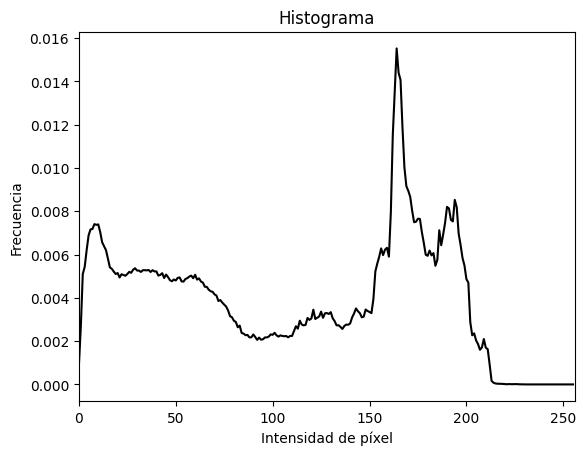

In [9]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('data/BBDD/bbdd_00000.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist /= hist.sum()

plt.plot(hist, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255
plt.show()


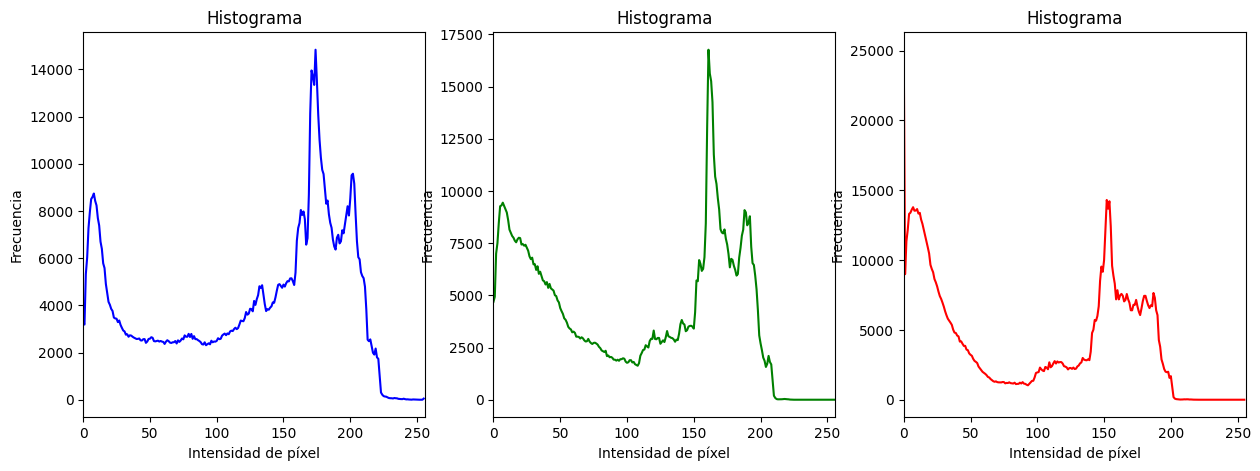

In [10]:
img_RGB=cv2.imread('data/BBDD/bbdd_00000.jpg')


B, G, R = cv2.split(img_RGB)

hist_B = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_R = cv2.calcHist([B], [0], None, [256], [0, 256])


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_B, color='blue')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255

plt.subplot(1, 3, 2)
plt.plot(hist_G, color='green')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255

plt.subplot(1, 3, 3)
plt.plot(hist_R, color='red')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255
plt.show()

#cv2.imshow('RGB Image', img_RGB)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [11]:
import os
import pickle

directory = 'data/BBDD/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)

        img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist_grey = cv2.calcHist([img_grey], [0], None, [256], [0, 256])
        hist_grey /= hist_grey.sum() # changed "hist.sum() to hist_grey.sum()"


        # RGB
        img_RGB=cv2.imread(img_path)
        B, G, R = cv2.split(img_RGB)

        hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
        hist_B /= hist_R.sum()

        hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
        hist_G /= hist_G.sum()

        hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
        hist_R /= hist_B.sum()


        histograms = {
            'grey': hist_grey,
            'hist_B': hist_B,
            'hist_G': hist_G,
            'hist_R': hist_R,
        }

        pkl_filename = os.path.splitext(filename)[0] + '.pkl'
        pkl_path = os.path.join(directory, pkl_filename)

        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(histograms, pkl_file)
        

KeyboardInterrupt: 

In [42]:
import numpy as np
import os
import pandas as pd

def euc_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")    
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sqrt(np.sum((h1 - h2) ** 2))

    return distance   

def L1_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(np.abs(h1 - h2))
    
    return distance
    
def X2_distance(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(((h1 - h2) ** 2) / (h1 + h2 + 1e-6))

    return distance

def histogram_similiarity(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.minimum(h1, h2))
    
    return similiarity

def hellinger_kernel(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.sqrt(h1*h2))

    return similiarity

directory = 'data/BBDD/'


for file_compare_image in os.listdir(directory): #catch the fisrt image then the second and so on
    if file_compare_image.endswith('.pkl'):
        pkl_grey_path = os.path.join(directory, file_compare_image)
        with open(pkl_grey_path, 'rb') as pkl_file:
            histograms_first = pickle.load(pkl_file)


    for filename in os.listdir(directory): #catch image by imag
            print('fisrt image')
            print(file_compare_image)
            
        if filename.endswith('.pkl') and filename != file_compare_image and filename !='relationships.pkl':
            pkl_path = os.path.join(directory, filename)

            with open(pkl_grey_path, 'rb') as pkl_file:
            print('compare image')
            print(filename)
            histograms = pe.load(pkl_file)

            # grey
            hisam_first_grey = histograms_first['grey']
            histogram_grey = #histograms['grey']

            index=file_compare_image + '#-' + filename    
        table_data = #{'name': [index], 'euc_dist': [euc_dist(histogram_first_gre#y, histogram_grey)], 'L1_dist': [L1_dist(histogram_first_grey, histogram_grey)], 'X2_dist': [X2_distance(histogram_first_grey, histogram_grey)], 'histogram_similarity': [histogram_similiarity(histogram_first_grey, histogram_grey)],  'hellinger_kernel': [hellinger_kernel(histogram_first_grey, histogram_grey)]}  #print(euc_dist(histogram_first_grey, histogram_grey))
        df =  pd.DataFrame(table_data)     
            #print(L1_dist(histogram_first_grey, histogram_grey))
            #print(X2_distance(histogram_first_grey, histogram_grey))
            #print(histogram_similiarity(histogram_first_grey, histogram_grey))
            #print(hellinger_kernel(histogram_first_grey, histogram_grey))

        
        


IndentationError: unindent does not match any outer indentation level (<string>, line 78)

In [46]:
def load_and_print_pkl(pkl_file_path):
    # Open the pickle file in binary read mode
    with open(pkl_file_path, 'rb') as pkl_file:
        # Load the content using pickle
        data = pickle.load(pkl_file)
        
        # Print the content of the pkl file
        print("Content of the pickle file:")
        print(data)

# Example usage
pkl_file_path = 'data/BBDD/bbdd_00000.pkl'  
load_and_print_pkl(pkl_file_path)

Content of the pickle file:
{'grey': array([[8.75065743e-04],
       [2.69191503e-03],
       [5.09858737e-03],
       [5.43217594e-03],
       [6.20378088e-03],
       [6.88352808e-03],
       [7.16103520e-03],
       [7.18037365e-03],
       [7.40373321e-03],
       [7.37085752e-03],
       [7.39116315e-03],
       [7.03726895e-03],
       [6.56444347e-03],
       [6.37976127e-03],
       [6.19507860e-03],
       [5.80250798e-03],
       [5.40606910e-03],
       [5.33838477e-03],
       [5.21075074e-03],
       [5.09955455e-03],
       [5.14499983e-03],
       [4.94001200e-03],
       [5.08891838e-03],
       [5.05217537e-03],
       [5.01929969e-03],
       [5.10052126e-03],
       [5.20011457e-03],
       [5.15563600e-03],
       [5.29970741e-03],
       [5.36545832e-03],
       [5.26103051e-03],
       [5.25716320e-03],
       [5.19431289e-03],
       [5.27553447e-03],
       [5.27650164e-03],
       [5.26779890e-03],
       [5.28520392e-03],
       [5.19334618e-03],
       [5.276

# FROM TODAY 3/10

In [12]:
import os
import pickle
import numpy as np

directory = 'data/BBDD/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)

        img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist_grey = cv2.calcHist([img_grey], [0], None, [256], [0, 256])
        hist_grey /= hist_grey.sum() # changed "hist.sum() to hist_grey.sum()"


        # RGB
        
        histograms_concatenated_rgb = []
        img_BGR = cv2.imread(img_path)
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        hist_r = cv2.calcHist([img_RGB], [0], None, [256], [0, 256])
        hist_r /= hist_r.sum()
        hist_r=hist_r.flatten() #It is used to treat an image as a one-dimensional vector, mainly when the matrices are not the same shape. Maybe in this case we are looking at, it is not necessary because the matrices have the same shape.
        histograms_concatenated_rgb.append(hist_r)

        hist_g = cv2.calcHist([img_RGB], [1], None, [256], [0, 256])
        hist_g /= hist_g.sum()
        hist_g=hist_g.flatten()
        histograms_concatenated_rgb.append(hist_g)

        hist_b = cv2.calcHist([img_RGB], [2], None, [256], [0, 256])
        hist_b /= hist_b.sum()
        hist_b=hist_b.flatten()
        histograms_concatenated_rgb.append(hist_b)

        concatenated_hist_rgb = np.concatenate(histograms_concatenated_rgb).ravel()


        histograms = {
            'grey': hist_grey,
            'hist_RGB': concatenated_hist_rgb,
        }

        pkl_filename = os.path.splitext(filename)[0] + '.pkl'
        pkl_path = os.path.join(directory, pkl_filename)

        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(histograms, pkl_file)

In [13]:
def euc_dist(h1, h2):
    
    h1 = np.array(h1)
    h2 = np.array(h2)
    
    distance = np.sqrt(np.sum((h1 - h2) ** 2))

    return distance   

def L1_dist(h1, h2):
    
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(np.abs(h1 - h2))
    
    return distance
    
def X2_distance(h1, h2):


    h1 = np.array(h1)
    h2 = np.array(h2)
    denominator = h1 + h2
    denominator = np.where(denominator == 0, 1, denominator)  # to not divide into zero
    distance = np.sum(((h1 - h2) ** 2) / denominator)

    return distance

def histogram_similiarity(h1, h2):

    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.minimum(h1, h2))
    
    return similiarity

def hellinger_kernel(h1, h2):
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.sqrt(h1*h2))

    return similiarity

### To take the distance/similarity measures between the images un dara folder

In [ ]:
directory = 'data/BBDD/'
df = pd.DataFrame()
list_files_used=[]
for file_compare_image in os.listdir(directory): #catch the fisrt image then the second and so on
    if file_compare_image.endswith('.pkl') and file_compare_image!='relationships.pkl':
        pkl_grey_path = os.path.join(directory, file_compare_image)
        with open(pkl_grey_path, 'rb') as pkl_file:
            histograms_first = pickle.load(pkl_file)
            print('fisrt image')
            print(file_compare_image)
            list_files_used.append(file_compare_image)

        for filename in os.listdir(directory):
            if filename.endswith('.pkl') and filename != file_compare_image and filename!='relationships.pkl'and filename not in list_files_used:
                pkl_path = os.path.join(directory, filename)
                print('compare image')
                print(filename)

                with open(pkl_path, 'rb') as pkl_file:
                    histograms = pickle.load(pkl_file)
            
                histogram_first_grey = histograms_first['grey']
                histogram_grey = histograms['grey']
                index=file_compare_image + '-' + filename
                new_line ={'name':index, 'euc_dist': euc_dist(histogram_first_grey, histogram_grey),'L1_dist':L1_dist(histogram_first_grey, histogram_grey),'X2_distance':X2_distance(histogram_first_grey, histogram_grey),'histogram_similarity':histogram_similiarity(histogram_first_grey, histogram_grey),'hellinger_kernel':hellinger_kernel(histogram_first_grey, histogram_grey)}
                df = pd.concat([df, pd.DataFrame([new_line])], ignore_index=True)
print(df)

# Task3

# First method

In [16]:
import os
import pickle
import numpy as np

directory = 'qsd1_w1/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)

        img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist_grey = cv2.calcHist([img_grey], [0], None, [256], [0, 256])
        hist_grey /= hist_grey.sum() # changed "hist.sum() to hist_grey.sum()"


        # RGB
        
        histograms_concatenated_rgb = []
        img_BGR = cv2.imread(img_path)
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        hist_r = cv2.calcHist([img_RGB], [0], None, [256], [0, 256])
        hist_r /= hist_r.sum()
        hist_r=hist_r.flatten() #It is used to treat an image as a one-dimensional vector, mainly when the matrices are not the same shape. Maybe in this case we are looking at, it is not necessary because the matrices have the same shape.
        histograms_concatenated_rgb.append(hist_r)

        hist_g = cv2.calcHist([img_RGB], [1], None, [256], [0, 256])
        hist_g /= hist_g.sum()
        hist_g=hist_g.flatten()
        histograms_concatenated_rgb.append(hist_g)

        hist_b = cv2.calcHist([img_RGB], [2], None, [256], [0, 256])
        hist_b /= hist_b.sum()
        hist_b=hist_b.flatten()
        histograms_concatenated_rgb.append(hist_b)

        concatenated_hist_rgb = np.concatenate(histograms_concatenated_rgb).ravel()


        histograms = {
            'grey': hist_grey,
            'hist_RGB': concatenated_hist_rgb,
        }

        pkl_filename = os.path.splitext(filename)[0] + '.pkl'
        pkl_path = os.path.join(directory, pkl_filename)

        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(histograms, pkl_file)

In [6]:
import pickle
with open(f'qsd1_w1/gt_corresps.pkl', 'rb') as f:
    ground_truth = pickle.load(f)

In [14]:
len(ground_truth) # I think that it is the ground_trouth for k1 with the index that corresponce to the images that have the lowest distance for each image in the querydataset

30

In [18]:
import re
directory = 'qsd1_w1'
directory_bbdd = 'data/BBDD/'

def extract_number_from_filename(filename):
    '''Function to extract the number of the image'''
    match = re.search(r'bbdd_(\d+)\.pkl', filename)
    if match:
        return int(match.group(1))
    
min_distance = float('inf')
list_results=[]    
for file_compare_image in os.listdir(directory): #catch the fisrt image then the second and so on of the qsd1_w1
    if file_compare_image.endswith('.pkl') and file_compare_image!='gt_corresps.pkl':
        pkl_grey_path = os.path.join(directory, file_compare_image)
        with open(pkl_grey_path, 'rb') as pkl_file:
            histograms_first = pickle.load(pkl_file)

        for filename in os.listdir(directory_bbdd):
            if filename.endswith('.pkl') and  filename!='relationships.pkl':
                pkl_path = os.path.join(directory_bbdd, filename)

                with open(pkl_path, 'rb') as pkl_file:
                    histograms = pickle.load(pkl_file)
                
                histogram_first_grey = histograms_first['grey']
                histogram_grey = histograms['grey']
                distance=L1_dist(histogram_first_grey, histogram_grey)
                
                if distance < min_distance:
                    min_distance=distance
                    index=extract_number_from_filename(filename)
                
        # when the loop for the first query image is finish we save the index in a list
        list_results.append(index)
print(list_results)

[120, 120, 120, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 133]
